In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.product as mep
import numpy as np
import datetime

In [2]:
grid0 = meb.grid([73,135,0.25],[18,55,0.25])
grd_fo = meb.read_griddata_from_micaps4(r'H:\test_data\input\mpd\ec_rain24_BT19123008.024',grid = grid0)
meb.set_griddata_coords(grd_fo,gtime = [datetime.datetime(2019,12,30,8,0)],dtime_list= [24],member_list= ["ECMWF"])
sta = meb.read_stadata_from_micaps3(r'H:\test_data\input\mpd\ob_rain24_BT19123108.000')
sta_ob = meb.between_value_range(sta, 0, 1000)

In [3]:
print(sta_ob)

      level                time  dtime     id     lon    lat  data0
0         0 2019-12-31 08:00:00      0  45004  114.17  22.31    0.0
1         0 2019-12-31 08:00:00      0  45005  114.17  22.30    0.0
2         0 2019-12-31 08:00:00      0  45007  113.91  22.30    0.0
7         0 2019-12-31 08:00:00      0  45032  114.15  22.52    0.0
8         0 2019-12-31 08:00:00      0  45035  113.98  22.47    0.0
...     ...                 ...    ...    ...     ...    ...    ...
2736      0 2019-12-31 08:00:00      0  59981  112.33  16.83    0.0
2737      0 2019-12-31 08:00:00      0  59985  111.62  16.53    0.0
2738      0 2019-12-31 08:00:00      0  59993  114.22  10.21    0.4
2739      0 2019-12-31 08:00:00      0  59994  114.29   9.71    0.4
2740      0 2019-12-31 08:00:00      0  59996  114.50   9.91    0.0

[2444 rows x 7 columns]


In [4]:
print(grd_fo)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 149, lon: 249)>
array([[[[[[0. , ..., 0.8],
           ...,
           [0.3, ..., 8.2]]]]]])
Coordinates:
  * member   (member) <U5 'ECMWF'
  * level    (level) float64 0.0
  * time     (time) datetime64[ns] 2019-12-30T08:00:00
  * dtime    (dtime) int32 24
  * lat      (lat) float64 18.0 18.25 18.5 18.75 19.0 ... 54.25 54.5 54.75 55.0
  * lon      (lon) float64 73.0 73.25 73.5 73.75 ... 134.2 134.5 134.8 135.0


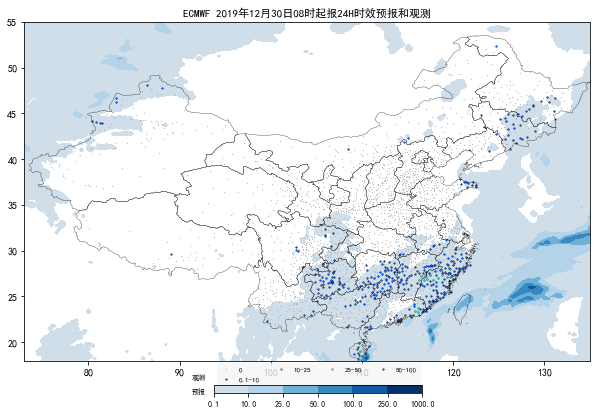

In [8]:
mep.rain_24h_sg(sta_ob,grd_fo)

In [9]:
mep.rain_24h_comprehensive_sg(sta_ob,grd_fo,r"H:\test_data\output\mpd\continues\rain24h_comprehensive.png")

In [10]:
mep.rain_24h_comprehensive_chinaland_sg(sta_ob,grd_fo,r"H:\test_data\output\mpd\continues\rain24h_com_china.png")

In [12]:
grid_jx = meb.grid([113,119,0.25],[24,31,0.25])
grd_fo_jx = meb.interp_gg_linear(grd_fo,grid_jx)
print(grd_fo_jx)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 29, lon: 25)>
array([[[[[[ 0. , ..., 13.5],
           ...,
           [ 0. , ...,  0.1]]]]]])
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) float64 0.0
  * time     (time) datetime64[ns] 2019-12-30T08:00:00
  * dtime    (dtime) int32 24
  * lat      (lat) float64 24.0 24.25 24.5 24.75 25.0 ... 30.25 30.5 30.75 31.0
  * lon      (lon) float64 113.0 113.2 113.5 113.8 ... 118.2 118.5 118.8 119.0


In [13]:
mep.rain_24h_comprehensive_sg(sta_ob,grd_fo_jx,r"H:\test_data\output\mpd\continues\rain24h_com_jx.png")

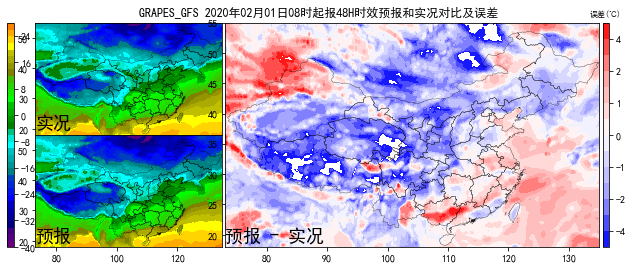

In [15]:
grd_fo48 = meb.read_griddata_from_nc(r'H:\test_data\input\mpd\grapes_t2m_BT20020108.048.nc',grid = grid0)
meb.set_griddata_coords(grd_fo48,gtime = [datetime.datetime(2020,2,1,8,0)],dtime_list= [48],member_list= ["GRAPES_GFS"])
grd_fo00 = meb.read_griddata_from_nc(r'H:\test_data\input\mpd\grapes_t2m_BT20020308.000.nc',grid = grid0)
meb.set_griddata_coords(grd_fo00,gtime = [datetime.datetime(2020,2,3,8,0)],dtime_list= [0],member_list= ["GRAPES_GFS"])
mep.temper_gg(grd_fo00,grd_fo48)

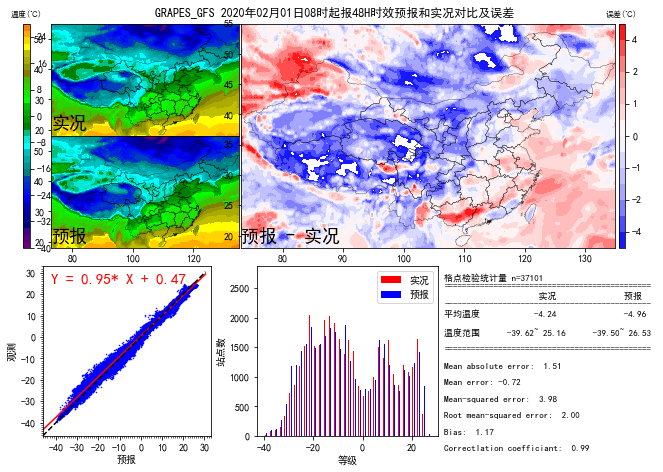

In [16]:
mep.temper_comprehensive_gg(grd_fo00,grd_fo48)